problem 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

arrival_rate = 6
num_runs = 123456


mean_time = 1 / arrival_rate

total_wait = 0
waiting_times = []

for run in range(num_runs):
    my_time = 50
 
    next_customer = my_time + np.random.exponential(scale=mean_time)

    wait_time = next_customer - my_time
    waiting_times.append(wait_time)  
    total_wait += wait_time


avg_wait = total_wait / num_runs

print("avg waiting time is: " + str(avg_wait * 60) + " minutes")



avg waiting time is: 10.013990684586618 minutes


problem 2

0.4957472660996355 0.24447144592952613 0.7479141352774402 0.24795463750506277


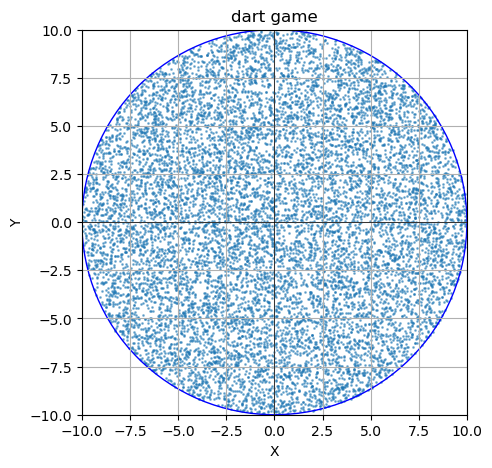

In [3]:
import math
import random
import matplotlib.pyplot as plt


def throw_dart():
    # random angle
    angle = random.random() * 2 * math.pi
     # random radius  
    radius = math.sqrt(random.random()) * 10 
    x = radius * math.cos(angle)  
    y = radius * math.sin(angle) 
    return x, y

def prob_right_half(n):
    count = 0
    for i in range(n):
        dart_x = throw_dart()[0]  
        if dart_x > 0:
            count += 1
    return count / n


def prob_distance_less_5(n):
    count = 0
    for i in range(n):
        x, y = throw_dart()  #
        if x**2 + y**2 < 5**2:
            count += 1
    return count / n

def prob_distance_more_5(n):
    count = 0
    for i in range(n):
        x, y = throw_dart()  
        if x**2 + y**2 > 5**2:
            count += 1
    return count / n

def prob_another_circle(n):
    count = 0
    for i in range(n):
        x, y = throw_dart()
        if x**2 + (y - 5)**2 < 5**2:
            count += 1
    return count / n


num_experiments = 12345


print(prob_right_half(num_experiments), prob_distance_less_5(num_experiments), 
      prob_distance_more_5(num_experiments), prob_another_circle(num_experiments))


darts_x = []
darts_y = []


for i in range(num_experiments):
    x, y = throw_dart()
    darts_x.append(x)
    darts_y.append(y)


plt.figure(figsize=(5, 5))
plt.scatter(darts_x, darts_y, alpha=0.5, s=1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
circle = plt.Circle((0, 0), 10, color='b', fill=False)
plt.gca().add_artist(circle)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title('dart game')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

problem 3 

In [4]:
import random

num_experiments = 12345
total_wins = 0

def run_simulation():
    positions = list(range(1, 101))
    random.shuffle(positions)

    seating_arrangement = [0 for _ in range(100)]

    seating_arrangement[random.randint(0, 99)] = 1

    for idx in range(1, 99):
        if seating_arrangement[positions[idx] - 1] == 0:
            seating_arrangement[positions[idx] - 1] = 1
        else:
            choice = random.randint(0, 99)
            while seating_arrangement[choice] != 0:
                choice = random.randint(0, 99)
            seating_arrangement[choice] = 1

    empty_seat_index = -1
    for idx in range(100):
        if seating_arrangement[idx] == 0:
            empty_seat_index = idx
            break

    is_winner = 0
    if empty_seat_index == positions[-1] - 1:
        is_winner = 1

    return is_winner


for i in range(num_experiments):
    total_wins += run_simulation()

print(total_wins / num_experiments)

0.5019036046982585


problem 4

In [5]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekate\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ekate\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import pos_tag
import json

with open(r'tweets.json', 'rb') as fp:
    tweets_data = json.load(fp)

all_words = []
all_nouns = []
all_proper_nouns = []


custom_stopwords = ['https','rt']
stop_words = set(stopwords.words('english'))

for tweet in tweets_data:
    tweet_concept = {
        'id': tweet.get('id', None),
        'text': tweet.get('text', None),
        'created_at': tweet.get('created_at', None),
        'likes': tweet.get('likes', None),
        'retweets': tweet.get('retweets', None)
    }

    words = word_tokenize(tweet_concept['text'])

    #stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in custom_stopwords and word.isalnum()]

    all_words.extend(filtered_words)
    pos_tags = pos_tag(filtered_words)
    nouns = [word for word, pos in pos_tags if pos.startswith('N')]
    all_nouns.extend(nouns)
    proper_nouns = [word for word, pos in pos_tags if pos.startswith('NNP')]
    all_proper_nouns.extend(proper_nouns)


freq_dist = FreqDist(all_words)
noun_freq_dist = FreqDist(all_nouns)
proper_noun_freq_dist = FreqDist(all_proper_nouns)

top_words = freq_dist.most_common(10)


In [8]:
#part 1
for word, frequency in top_words:
    print(f"{word}: {frequency} times")

like: 169 times
one: 115 times
good: 108 times
time: 105 times
see: 91 times
people: 89 times
would: 86 times
think: 82 times
work: 81 times
get: 78 times


In [9]:
#part 2
top_nouns = noun_freq_dist.most_common(10)
for noun, frequency  in top_nouns:
    print(f"{noun}: {frequency} times")

time: 105 times
people: 89 times
textfiles: 76 times
work: 66 times
thing: 65 times
year: 47 times
years: 47 times
mathowie: 42 times
way: 41 times
man: 40 times


In [10]:
# part 3
top_proper_nouns = proper_noun_freq_dist.most_common(10)
for noun, frequency  in top_proper_nouns:
    print(f"{noun}: {frequency} occurrences")

JasonPunyon: 39 occurrences
Apple: 31 occurrences
Beschizza: 30 occurrences
Android: 27 occurrences
Pro: 26 occurrences
Discourse: 25 occurrences
FW: 24 occurrences
Twitter: 23 occurrences
CPU: 21 occurrences
VR: 21 occurrences


4.4

In [11]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import json
from datetime import datetime

with open(r'tweets.json', 'rb') as fp:
    tweets_data = json.load(fp)

input_word = input("frequency analysis word: ").lower()

dates = []
monthly_word_frequencies = {}
word_frequencies = []

for tweet in tweets_data:
    tweet_concept = {
        'text': tweet.get('text', None),
        'created_at': tweet.get('created_at', None),
    }

    if tweet_concept['text'] and tweet_concept['created_at']:
        words = word_tokenize(tweet_concept['text'])
        word_freq = FreqDist(words)[input_word]

        if word_freq:
#parsing
            date_str = tweet_concept['created_at']
            try:
                date_obj = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S +0000')
                dates.append(date_obj)
                word_frequencies.append(word_freq)

                month_year = (date_obj.year, date_obj.month)
                monthly_word_frequencies[month_year] = monthly_word_frequencies.get(month_year, 0) + word_freq
            except ValueError:
# in case of errors
                print(f"Skipping invalid date format: {date_str}")

# if no data to plot
if not monthly_word_frequencies:
    print("No occurrences of the word found in the tweets.")
else:
    formatted_keys = [f"{month}-{year}" for year, month in monthly_word_frequencies.keys()]
    frequencies = list(monthly_word_frequencies.values())


    plt.figure(figsize=(12, 6))
    plt.bar(formatted_keys, frequencies, width=0.8, align='center', alpha=0.7)

    plt.xlabel('m/y')
    plt.ylabel(f'choosen word "{input_word}"')
    plt.title(f'meeting the word "{input_word}" doring months ')
    plt.tight_layout()
    plt.show()


No occurrences of the word found in the tweets.


4.5

In [12]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import pos_tag
import json


with open(r'tweets.json', 'rb') as fp:
    tweets_data = json.load(fp)


custom_stopwords = ['https','rt' , 'http']
stop_words = set(stopwords.words('english'))

word_like = {}
word_retweet = {}
all_nouns = []

for tweet in tweets_data:
    tweet_concept = {
        'id': tweet.get('id', None),
        'text': tweet.get('text', None),
        'created_at': tweet.get('created_at', None),
        'likes': tweet.get('likes', None),
        'retweets': tweet.get('retweets', None)
    }

    words = word_tokenize(tweet_concept['text'])
    likes = tweet_concept['likes']
    retweets = tweet_concept['retweets']
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word.lower() not in custom_stopwords and word.isalnum()]
    pos_tags = pos_tag(filtered_words)
    nouns = [word for word, pos in pos_tags if pos.startswith('N')]
    all_nouns.extend(nouns)
    for w in  nouns:
        if w in word_like:
            word_like[w] += int(likes)
            word_retweet[w] += int(retweets)
        else:
            word_retweet[w] = int(retweets)
            word_like[w] = int(likes)

noun_pop = {}
freq_dist = FreqDist(all_nouns)
top_nouns = freq_dist.most_common()
for w, frequency in top_nouns:
    norm_retweet = (word_retweet.get(w, 0) - min(word_retweet.values())) / (max(word_retweet.values()) - min(word_retweet.values()))
    norm_likes = (word_like.get(w, 0) - min(word_like.values())) / (max(word_like.values()) - min(word_like.values()))

    popularity = frequency * (1.4 + norm_retweet) * (1.2 + norm_likes)
    noun_pop[w] = popularity

sorted_noun_pop = dict(sorted(noun_pop.items(), key=lambda item: item[1], reverse=True))

for i, (noun, score) in enumerate(sorted_noun_pop.items()):
    print(f"{noun}: {score}")
    if i == 9:
        break


time: 612.48
people: 360.8009848200603
thing: 201.6228248441291
work: 171.8044592064147
textfiles: 130.0594148545951
years: 116.45407479106024
year: 99.67242396772853
kids: 96.04567551263482
way: 93.42971487900411
game: 89.69777629636124


typing prediction 4.6

In [13]:

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import json

with open(r'tweets.json', 'rb') as fp:
    tweets_data = json.load(fp)

all_proposed_words = []
input_begining = input("introduce a frangment of the word : ")


custom_stopwords = ['https','rt']
stop_words = set(stopwords.words('english'))

for tweet in tweets_data:
    tweet_concept = {
        'text': tweet.get('text', None),
    }

    words = word_tokenize(tweet_concept['text'])
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in custom_stopwords and word.isalnum()]
    proposed_words = [word for word in filtered_words if word.startswith(input_begining.lower())]
    all_proposed_words.extend(proposed_words)


proposed_words_freq_dist = FreqDist(all_proposed_words)
top_proposed_words = proposed_words_freq_dist.most_common(7)
print("Proposed words:")
for word, frequency in top_proposed_words:
    print(f"{word} : {frequency} occurences")


Proposed words:
like : 169 occurences
one : 115 occurences
good : 108 occurences
time : 105 occurences
see : 91 occurences
people : 89 occurences
would : 86 occurences


In [18]:

import json
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import pos_tag

with open(r'tweets.json', 'rb') as fp:
     tweets_data = json.load(fp)

input_word = input("enter the word: ")

suggestions = {}
custom_stopwords = ['https','rt']
stop_words = set(stopwords.words('english'))

for tweet in tweets_data:
    tweet_text = tweet.get('text', None)
    words = word_tokenize(tweet_text)
    filtered_words = [word for word in words if word.lower() not in stop_words and word.lower() not in custom_stopwords and word.isalnum()]
    for i in range(len(filtered_words) - 1):
        current_word = words[i].lower()

        if current_word == input_word.lower() and i < len(words) - 1:
            next_word = filtered_words[i + 1].lower()

            if next_word.isalnum() and next_word:

                if next_word in suggestions:
                    suggestions[next_word] += 1
                else:
                    suggestions[next_word] = 1


print(f"suggestions for continuing '{input_word}':")
freq_dist = FreqDist(suggestions)
top_suggestions = freq_dist.most_common(3)
for suggestion, occurrences in top_suggestions:
    print(f"{suggestion}: {occurrences} times")


suggestions for continuing 'apple':
iphone: 2 times
worth: 1 times
super: 1 times
long: 1 times
tablets: 1 times
better: 1 times
lower: 1 times
america: 1 times
watch: 1 times
big: 1 times
